# **Data Visualisation**

## Objectives

* Use the processed healthcare dataset to explore how regional, personal and lifestyle factors can influence insurance charges.
* Create clear data visualisations to support or challenge project hypotheses.

## Inputs

* Cleaned dataset from 'data/processed/insurance_costs_cleaned.scsv' file
* Python libraries: pandas, matplotlib, seaborn

## Outputs

* A series of data visualisations (such as boxplots, bar charts, scatter plots, violin and sunburst) comparing insurance charges across different variables.
* Key observations and insights drawn from data visualisations to support hypothesis testing

## Additional Comments

* 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\JayneLawley\\OneDrive - xoix\\Jayne Folders\\Data An and AI Course\\vscode-projects\\Project-1-Healthcare-Insurance-Cost\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\JayneLawley\\OneDrive - xoix\\Jayne Folders\\Data An and AI Course\\vscode-projects\\Project-1-Healthcare-Insurance-Cost'

In [4]:
import pandas as pd # import the pandas library for data manipulation

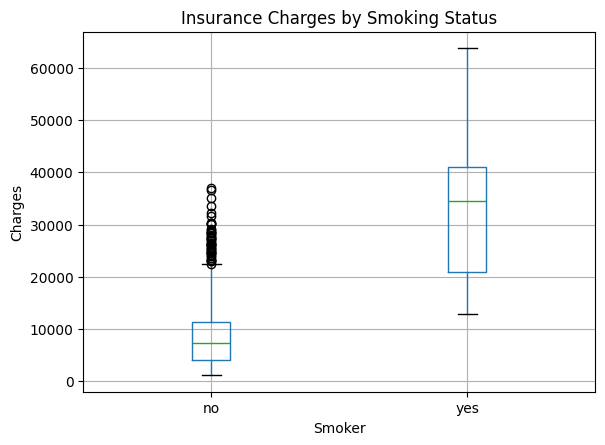

In [5]:
import matplotlib.pyplot as plt # import the matplotlib library for data visualisation
df = pd.read_csv('data/processed/insurance_costs_cleaned.csv') # load the cleaned dataset
df.boxplot(column='charges', by='smoker') # create a boxplot of the 'charges' column grouped by the 'smoker' column

# customise the box plot to make it more informative
plt.title('Insurance Charges by Smoking Status')
plt.suptitle('') # removes the automatic boxplot title
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Section 1

Section 1 content

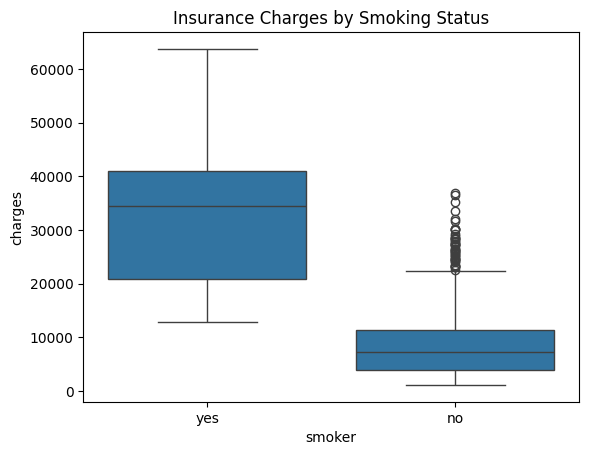

In [6]:
import seaborn as sns # import the seaborn library for enhanced data visualisation
sns.boxplot(data=df, x='smoker', y='charges') # create a boxplot using seaborn for the 'charges' column grouped by the 'smoker' column

# customise the box plot to make it more informative
plt.title('Insurance Charges by Smoking Status')
plt.show()

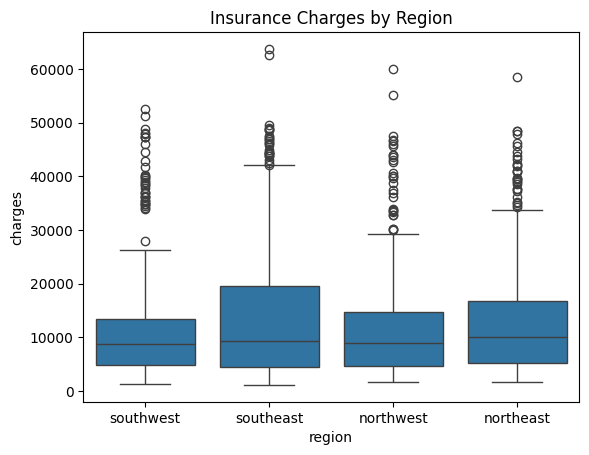

In [7]:
sns.boxplot(data=df, x='region', y='charges') # create a boxplot using seaborn for the 'charges' column grouped by the 'region' column

# customise the box plot to make it more informative
plt.title('Insurance Charges by Region')
plt.show()

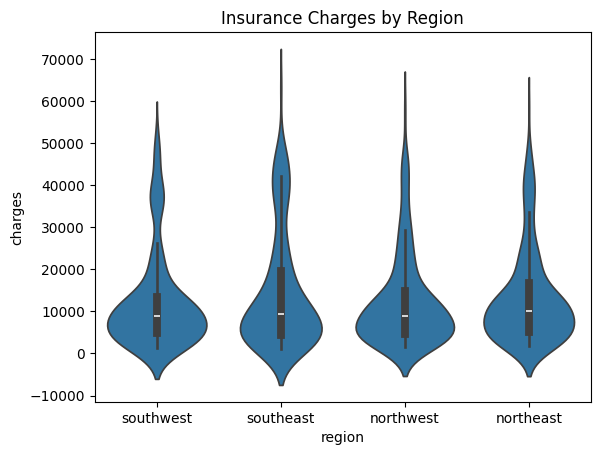

In [8]:
import matplotlib.pyplot as plt # import the matplotlib library for data visualisation

sns.violinplot(data=df, x='region', y='charges') # create a violin plot using seaborn for the 'charges' column grouped by the 'region' column

# customise the violin plot to make it more informative
plt.title('Insurance Charges by Region')
plt.show()

---

# Section 2

Section 2 content

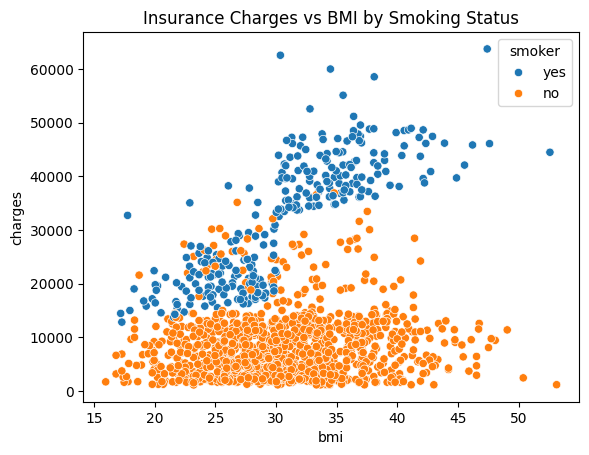

<Figure size 1000x600 with 0 Axes>

In [9]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker') # create a scatter plot using seaborn for the 'charges' column vs 'bmi'
plt.title('Insurance Charges vs BMI by Smoking Status') # add title for improved readability
plt.figure(figsize=(10,6)) # set the figure size for better visibility
plt.show()

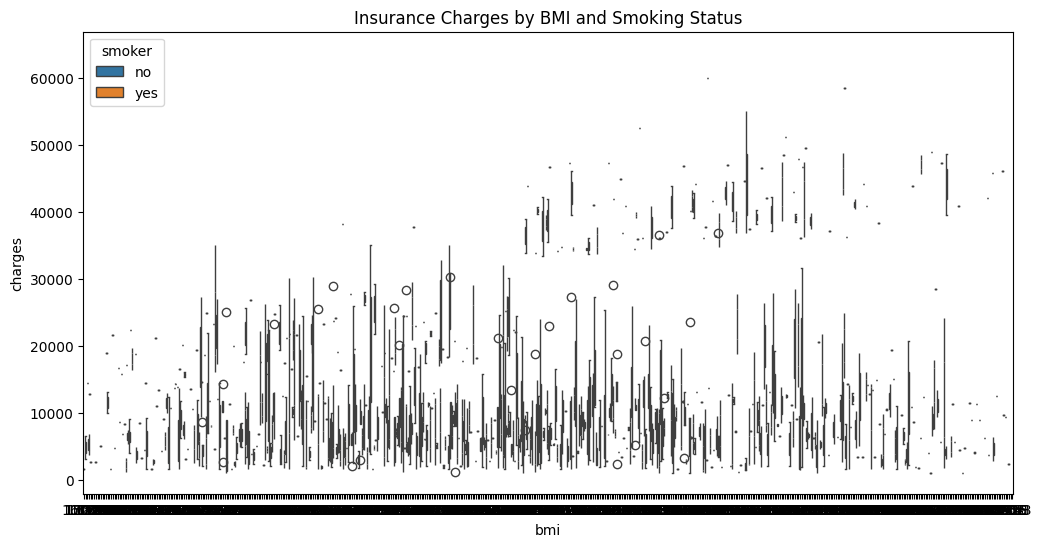

In [10]:
# Boxplot with hue smoker
plt.figure(figsize=(12,6)) # set the figure size for better visibility
sns.boxplot(data=df, x='bmi', y='charges', hue='smoker') # create a boxplot using seaborn for the 'charges' column grouped by the 'bmi' and 'smoker' columns


plt.title('Insurance Charges by BMI and Smoking Status') # add title for improved readability
plt.show() # display the plot


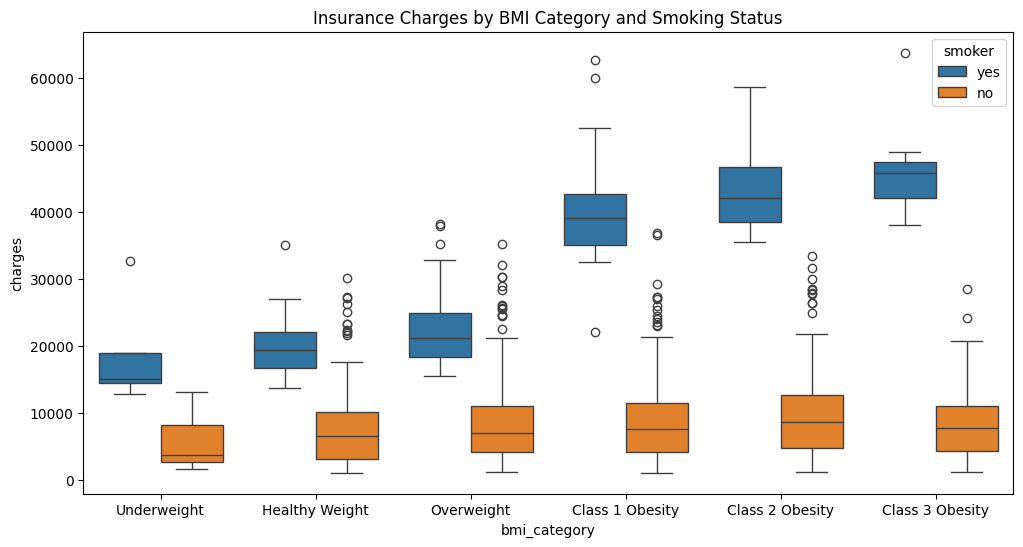

In [11]:
"""
Create function for BMI category to improve boxplot. Category data taken from https://www.cdc.gov/
"""
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Healthy Weight'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    elif bmi >=30 and bmi < 35:
        return 'Class 1 Obesity'
    elif bmi >= 35 and bmi < 40:
        return 'Class 2 Obesity'
    else:
        return 'Class 3 Obesity'
    
# apply the function to my dataset
df['bmi_category'] = df['bmi'].apply(bmi_category)
# set medical order to bmi to help clarity of seeing impact of each medical category
bmi_order = [
    'Underweight',
    'Healthy Weight',
    'Overweight',
    'Class 1 Obesity',
    'Class 2 Obesity',
    'Class 3 Obesity'
]
    
    # Boxplot with hue smoker and bmi_category
plt.figure(figsize=(12,6)) # set the figure size for better visibility
sns.boxplot(data=df, x='bmi_category', y='charges', hue='smoker', order=bmi_order) # create a boxplot using seaborn for the 'charges' column grouped by the 'bmi' and 'smoker' columns


plt.title('Insurance Charges by BMI Category and Smoking Status') # add title for improved readability
plt.show() # display the plot


C:\Users\JayneLawley\AppData\Local\Temp\ipykernel_6664\3654308040.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges_age = df.groupby('age_group')['charges'].mean().reset_index()


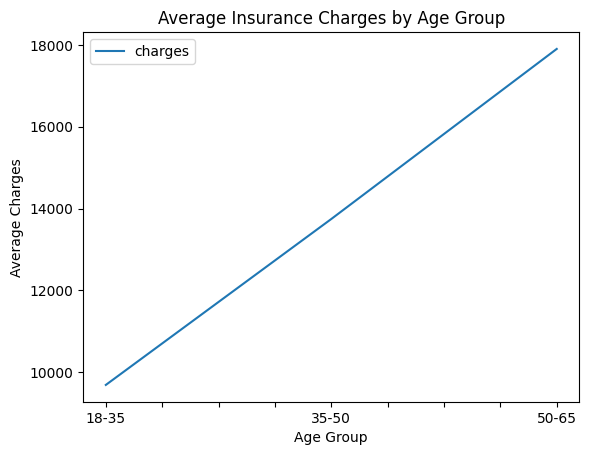

In [12]:
# Line plot with age bins
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['<18', '18-35', '35-50', '50-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

average_charges_age = df.groupby('age_group')['charges'].mean().reset_index()
average_charges_age.plot(kind='line', x='age_group', y='charges')
plt.title('Average Insurance Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.show()


In [13]:
# Scatter plot ag vs charges
import plotly.express as px # import the plotly express library for interactive visualisations

# basic scatter plot of age and smoking status vs charges
fig = px.scatter(df, x='age', y='charges', 
                 color='smoker', 
                 title='Insurance Charges by Age and Smoking Status',
                 trendline='ols',
                 marginal_x='box',
                 marginal_y='box'
                 ) # this adds a trendline to the scatter plot
fig.show() # display the figure



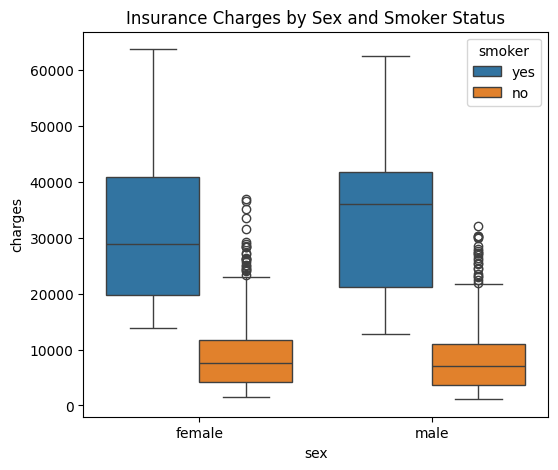

In [14]:
# Gender and smoker impact on charges check
plt.figure(figsize=(6,5)) # set the figure size for better visibility
sns.boxplot(data=df, x='sex', y='charges', hue='smoker')  # set x axis to 'sex' and y to 'charges'
plt.title('Insurance Charges by Sex and Smoker Status') # add title for clarity
plt.show() # display the plot


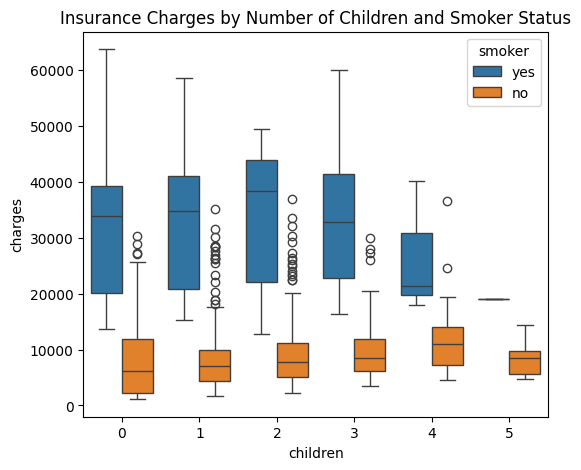

In [15]:
# Number of Children and smoker impact on charges check
plt.figure(figsize=(6,5)) # set the figure size for better visibility
sns.boxplot(data=df, x='children', y='charges', hue='smoker')  # set x axis to 'children' and y to 'charges'
plt.title('Insurance Charges by Number of Children and Smoker Status') # add title for clarity
plt.show() # display the plot


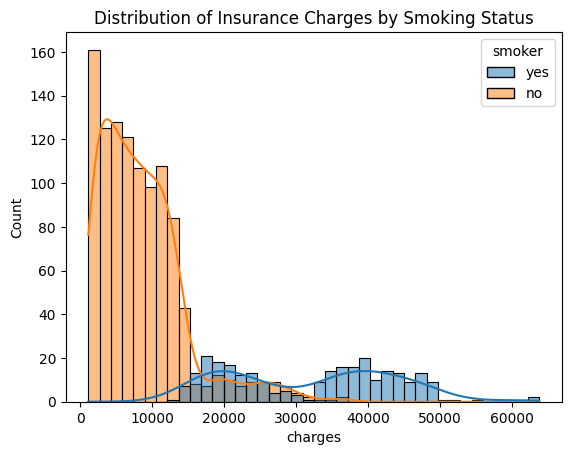

In [28]:
# Histogram charges coloured by smoker status
sns.histplot(data=df, x='charges', hue='smoker', kde=True, bins=40) # create a histogram using seaborn for the 'charges' column coloured by 'smoker' status
plt.title('Distribution of Insurance Charges by Smoking Status') # add title for clarity
plt.show() # display the plot

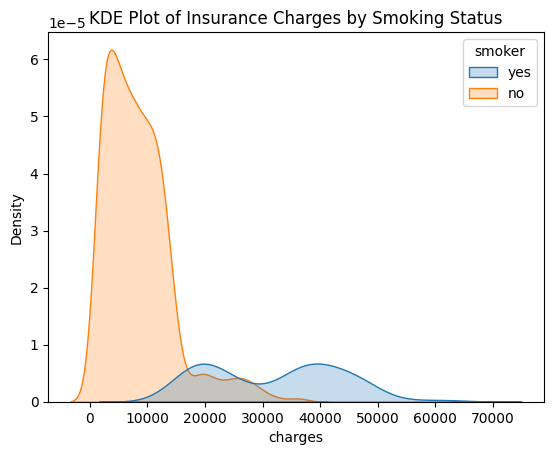

In [30]:
#KDE Plot (kernel density estimate) chargers and smoker
sns.kdeplot(data=df, x='charges', hue='smoker', fill=True) # create a KDE plot using seaborn for the 'charges' column coloured by 'smoker' status
plt.title('KDE Plot of Insurance Charges by Smoking Status') # add title for clarity
plt.show() # display the plot

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [31]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (3043209317.py, line 5)